<a href="https://colab.research.google.com/github/ericzundel/imagecapturegui/blob/main/Copy_of_Part_2_Laila_Shannon_Final_Student_Recognition_Model_Template_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the starting point of your final face recognition model.  You will need to fill in all of the missing boxes with correct code.  You are also required to write correct and descriptive comments in each block. Your model needs to reach a 80% accuracy on your testing data for your final project.**

In [ ]:
from tensorflow import keras # imports all of the necessary libraries and functions from libraries that are needed to run this code
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np
import os, shutil, pathlib
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [ ]:
def show_image(im): # defines show image function with the parameter im, the function uses a method to alter the appearance of the image with a filter and them image gets called
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [ ]:
def show_image_vpp(im,value,prediction,probability): #defines function called show_image_vpp with the parameters im, value, prediction and probabilitiy. Method is used to change the color filter apearance of the image. The actual value of the image is prined as well as the predicted value with the probability
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",student_names[value])
  print("The predicted value is ",student_names[prediction]," with probability: ",probability)

Keep this as is for now. Once you get everything running, you will come back to this and build out the layers using what you know.

In [ ]:
def build_model(input_shape): #The function build_model is defined with input_shape as the parameter, model is returned based on the parameters given for each layer of the model.
    input = keras.Input(shape=(input_shape,),name="data")
    l1 = layers.Dense(32,activation="relu")(input)
    l2 = layers.Dense(32,activation="relu")(l1)
    l3 = layers.Dense(32,activation="relu")(l2)
    l4 = layers.Dense(32,activation="relu")(l3)
    l5 = layers.Dense(32,activation="relu")(l4)
    l6 = layers.Dense(32,activation="relu")(l5)
    l7 = layers.Dense(32,activation="relu")(l6)
    l8 = layers.Dense(32,activation="relu")(l7)
    l9 = layers.Dense(32,activation="relu")(l8)
    l10 = layers.Dense(32,activation="relu")(l9)
    output = layers.Dense(38,activation="softmax")(l10)
    model = keras.Model(inputs=input,outputs=output)
    return model

1) Explain what the 38 means in the output layer.  

Answer:  The 38 represents the number of possible outcomes or the number of faces in the dataset.

Note that the number of epochs below is 1.  Don't change it for now, but after you get everything else working, you will need to come back and address this to improve your model's accuracy.  ***

In [ ]:
def train_model(model,train_tensors,train_labels): #The function called train_model is defined and uses the parameters model, train_tensors, and train labels. There are a few strings assigned to variables including the measure of accuracy for this dataset. The fit method is used with the parameters epoch #train_tensors and train_labels
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=500)

2) How do you know if you need more or less epochs?  

Answer:  You know if you need more epochs when the learning model's accuracy is not hight enough. You know if you need less when there is overfitting.

In [ ]:
def predict(model,test_tensors): # The function called predict is defined with the parameters model & test_tensors. There are methods assigned to the varables mpredictions, digit_predictions, and digit_probability. digit_predictions & digit_probability are returned.
    mpredictions = model.predict(test_tensors)
    digit_predictions = np.array([x.argmax() for x in mpredictions])
    digit_probability = np.array([mpredictions[i][p] for i, p in enumerate(digit_predictions)])
    return digit_predictions,digit_probability

# Get the training and testing data.  Use this video if you are absent when I go over this in class.  

This is new code and it is not expected that you understand this, but you need to add a shortcut to this folder on your google drive.  Once you have your shortcut, replace the below path after "My Drive/" with your path. I will walk you through this step in class. Once you have done that, run this code to confirm you are accessing the class image files.  If you are not here when we do this part, you can watch this video of how to do it here: https://www.loom.com/share/4316be2eaac34ddfa1fcfed7d7bbbbcf?sid=725db59f-5ceb-43b4-bb14-5c37dd947108
  

Folder link: https://drive.google.com/drive/folders/1Lnhpm_B231bTZ8__k6Rw3BYDwei-dQYO?usp=sharing


In [ ]:
from google.colab import drive #Imports the data set from google drive and formats them
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003"
plt.figure(figsize=(10, 10))
size_picture = 100

Mounted at /content/gdrive
 Alexandra_Price      Destin_Woolf	  Justin_Leake	  "Rhyland_O'Neill"
 Armon_Anderson       Donald_Humphrey	  Kaci_Turner	  'Tahlin_Thompson Saunders-Brathwaite'
 Austin_Smith	      Don_Evans		  Kenadie_Smith    Tarrence_Sturdivant
 Beth_White	      Emma_Davis	  Kendrick_Myers   Thorn_High
 Chase_Griffin	      Eric_Ayers	  Kristine_Allen   Trinity_Smith
 Christian_Hill       Jackson_Humphries   Laila_Shannon    Tunazi_Bello
 Cordarius_Williams   Jonathan_Thompson   Landon_Cox	   Victor_Hicks
 Curtis_Augustin      Joshua_Boney	  Lucian_Leon	  'Zediwa_De Jesus'
 David_Kurt	      Julian_Carlson	  Malik_Weems
 Destin_Jack	      Justin_Brown	  Peter_McKnight


<Figure size 1000x1000 with 0 Axes>

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

3) In the digit recognition model, what did this (above) block of code do?  Break down your answer into all four parts.

Answer: This line imported the data into training and testing sections. There is a set of images and labels in both training and testing. The training set uses the most data. This is where the machine learns how to predict the names that correspond with the images. The training set is similar but this is where the machine is supposed to execute with the most accuracy.

Bonus: The combination of the two next functions will do what the above function did for the MNIST dataset.  You can get up to 40 KT bonus on your project if you can write correct line by line comments on what these lines of code do.  This must be your own work to be considered for bonus. Do not use another person or AI to help. If yo don't want bonus, just run the next two code blocks. ***

In [ ]:
def tensor_from_image(filename): #defines the function tensre_from_image with the parameter filename
    img = load_img(filename,color_mode = 'grayscale') #load image with the parameters filename and color mode set to grayscale is assigned to the variable img
    img = img.resize((size_picture,size_picture)) #img goes through the resize method  with the parameters size_picture,size_picture and is assigned to the variable img
    return img_to_array(img).reshape((size_picture,size_picture)) #img_to_array(img) is reshaped with the parameter (size_picture, size_picture) and is returned

In [ ]:
def load_dataset(): #The function load_dataset is defined
    train_images = [] #empty list assigned to train_images
    train_labels = [] #empty list assigned to train_labels
    test_images = [] #empty list assigned to test_images
    test_labels = [] #empty list assigned to test_labels
    base_directory = pathlib.Path('/content/gdrive/My Drive/ML_Image_Data/MLImages-backup-240416-140003') #pathlib uses the Path method with a parameter that loads the data from the drive and is assigned to base_directory
    student_names = os.listdir(base_directory) #os undergoes the method listdir with base_directory as the parameter and is assigned to student_names
    k = 0 #0 is assigned to k
    n = 0 #0 is assigned to n
    names = [] #empty list is assigned to names
    for i, s in enumerate(student_names): #for loop that iterates (through an array?) with a parameter (student_names )
        print(i,s) #values in i and s are printed
        if s!=".DS_Store": #beginning of selection programming, if i does not equal the string given the program will execute the next couple lines of code
            names.append(s) #the list called names will add the s value
            student_directory = base_directory / s #base_directory divided by the s value is assigned to student_directory
            image_names = os.listdir(student_directory) #os undergoes the listdir method with the parameter student_directory and is assigned to image_names
            for i in image_names: #for loop that executes for each item in image_names
                fname = student_directory / i #student_directory divided by the i value is assigned to fname
                t = tensor_from_image(fname)/255 #tensor_from_image with the parameter fname is assigned to t
                if n % 9 == 0: #selection programming, if the remainder of n divided by 9 equals 0
                    test_images.append(t) #test_images undergoes the append method with the parameter t
                    test_labels.append(k) #test_labels undergoes the append method with the parameter k
                else:
                    train_images.append(t) #train_imagess undergoes the append method with the parameter t
                    train_labels.append(k) #train_labels undergoes the append method with the parameter k
                n += 1 #n increases by one
            k += 1 #k increases by one
    return (k,
            (np.array(train_images),np.array(train_labels)),
            (np.array(test_images),np.array(test_labels)),
            names
           ) #k as well as train_images, train_labels, test_images, and test_labels that are parameters of np.array are returned

Run this code to load your data.  

In [ ]:
(nb_students,(train_images,train_labels),(test_images,test_labels),student_names) = load_dataset() #loads the data set and assigns part of it to train images/labels and test images/labels


0 Donald_Humphrey
1 Chase_Griffin
2 Armon_Anderson
3 Joshua_Boney
4 Destin_Jack
5 Beth_White
6 Lucian_Leon
7 Jonathan_Thompson
8 Tahlin_Thompson Saunders-Brathwaite
9 Julian_Carlson
10 Laila_Shannon
11 Destin_Woolf
12 Malik_Weems
13 Kaci_Turner
14 Thorn_High
15 Cordarius_Williams
16 Tunazi_Bello
17 Victor_Hicks
18 Peter_McKnight
19 Zediwa_De Jesus
20 Justin_Brown
21 Alexandra_Price
22 Kendrick_Myers
23 Eric_Ayers
24 Curtis_Augustin
25 Kenadie_Smith
26 Rhyland_O'Neill
27 Justin_Leake
28 Jackson_Humphries
29 Tarrence_Sturdivant
30 Austin_Smith
31 Kristine_Allen
32 David_Kurt
33 Emma_Davis
34 Landon_Cox
35 Christian_Hill
36 Trinity_Smith
37 Don_Evans


Print out each of the six items in the loaded data to get an idea of or refresh yourself on what they are.

4) Print the first item.

In [ ]:
print(nb_students) #prints nb_students

38


5) Print the second item.

In [ ]:
print(train_images) #prints train_images

[[[0.6313726  0.6313726  0.6313726  ... 0.6        0.6431373  0.63529414]
  [0.6313726  0.6313726  0.627451   ... 0.6509804  0.69803923 0.6392157 ]
  [0.6313726  0.6313726  0.6313726  ... 0.65882355 0.7019608  0.6431373 ]
  ...
  [0.47843137 0.49019608 0.5058824  ... 0.7882353  0.78039217 0.7882353 ]
  [0.45882353 0.4509804  0.44705883 ... 0.72156864 0.7882353  0.7137255 ]
  [0.47058824 0.4627451  0.4745098  ... 0.64705884 0.7882353  0.6156863 ]]

 [[0.6313726  0.627451   0.627451   ... 0.6        0.6392157  0.6313726 ]
  [0.627451   0.62352943 0.62352943 ... 0.6431373  0.69803923 0.63529414]
  [0.627451   0.62352943 0.62352943 ... 0.654902   0.69803923 0.6392157 ]
  ...
  [0.4745098  0.49019608 0.5058824  ... 0.78039217 0.7764706  0.78039217]
  [0.45490196 0.45490196 0.44313726 ... 0.7176471  0.78039217 0.70980394]
  [0.46666667 0.45882353 0.4627451  ... 0.6392157  0.78039217 0.60784316]]

 [[0.59607846 0.5921569  0.59607846 ... 0.5686275  0.6117647  0.5647059 ]
  [0.59607846 0.592156

6) Print the third item.

In [ ]:
print(train_labels) #prints train_labels

[ 0  0  0 ... 37 37 37]


7) Print the 4th item.

In [ ]:
print(test_images) #prints test_images

[[[0.69411767 0.69803923 0.7019608  ... 0.5176471  0.5568628  0.5372549 ]
  [0.69803923 0.6784314  0.6392157  ... 0.54901963 0.59607846 0.57254905]
  [0.5058824  0.4392157  0.39215687 ... 0.53333336 0.5921569  0.54901963]
  ...
  [0.38039216 0.37254903 0.35686275 ... 0.6313726  0.64705884 0.65882355]
  [0.3647059  0.2901961  0.23529412 ... 0.54901963 0.65882355 0.54901963]
  [0.2        0.16470589 0.19215687 ... 0.49803922 0.6392157  0.5254902 ]]

 [[0.5882353  0.58431375 0.58431375 ... 0.57254905 0.61960787 0.6156863 ]
  [0.58431375 0.5803922  0.5803922  ... 0.6156863  0.6745098  0.6313726 ]
  [0.58431375 0.58431375 0.58431375 ... 0.62352943 0.68235296 0.62352943]
  ...
  [0.46666667 0.46666667 0.47058824 ... 0.7411765  0.7411765  0.7490196 ]
  [0.47058824 0.4509804  0.43529412 ... 0.6627451  0.7529412  0.6784314 ]
  [0.4392157  0.39215687 0.38431373 ... 0.59607846 0.7490196  0.6039216 ]]

 [[0.69411767 0.69803923 0.7019608  ... 0.52156866 0.5568628  0.5372549 ]
  [0.69803923 0.682352

8) Print the 5th item.

In [ ]:
print(test_labels) #prints test_labels

[ 0  0  0  0  0  1  1  1  1  1  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10
 10 10 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 16 16 16 16 16 16 16 16 18 18 18 18 18 18 18 19 19 19 19 19 19
 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21
 21 21 21 21 21 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 23 23 23 23 24 25 25 25 25 25 25 25 25 25 25 25 25
 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28
 28 28 28 28 28 28 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 31 31
 31 31 31 33 33 33 33 33 33 33 34 34 34 35 35 35 37]


9) Print the 6th item.

In [ ]:
print(student_names) #prints student_names

['Donald_Humphrey', 'Chase_Griffin', 'Armon_Anderson', 'Joshua_Boney', 'Destin_Jack', 'Beth_White', 'Lucian_Leon', 'Jonathan_Thompson', 'Tahlin_Thompson Saunders-Brathwaite', 'Julian_Carlson', 'Laila_Shannon', 'Destin_Woolf', 'Malik_Weems', 'Kaci_Turner', 'Thorn_High', 'Cordarius_Williams', 'Tunazi_Bello', 'Victor_Hicks', 'Peter_McKnight', 'Zediwa_De Jesus', 'Justin_Brown', 'Alexandra_Price', 'Kendrick_Myers', 'Eric_Ayers', 'Curtis_Augustin', 'Kenadie_Smith', "Rhyland_O'Neill", 'Justin_Leake', 'Jackson_Humphries', 'Tarrence_Sturdivant', 'Austin_Smith', 'Kristine_Allen', 'David_Kurt', 'Emma_Davis', 'Landon_Cox', 'Christian_Hill', 'Trinity_Smith', 'Don_Evans']


10) Assign the shape of train_images to train_shape. Print train_shape.

In [ ]:
train_shape = train_images.shape #assigns the shape of train_images to train_shape and prints train_shape
train_shape

(2244, 100, 100)

11) Print out the first image train_images in matrix format.



In [ ]:
train_images[0] #prints out the first image of train_images in matrix format

array([[0.6313726 , 0.6313726 , 0.6313726 , ..., 0.6       , 0.6431373 ,
        0.63529414],
       [0.6313726 , 0.6313726 , 0.627451  , ..., 0.6509804 , 0.69803923,
        0.6392157 ],
       [0.6313726 , 0.6313726 , 0.6313726 , ..., 0.65882355, 0.7019608 ,
        0.6431373 ],
       ...,
       [0.47843137, 0.49019608, 0.5058824 , ..., 0.7882353 , 0.78039217,
        0.7882353 ],
       [0.45882353, 0.4509804 , 0.44705883, ..., 0.72156864, 0.7882353 ,
        0.7137255 ],
       [0.47058824, 0.4627451 , 0.4745098 , ..., 0.64705884, 0.7882353 ,
        0.6156863 ]], dtype=float32)

12) Print out the first image in train images in image format.

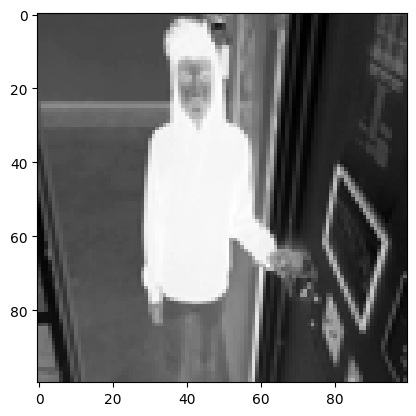

In [ ]:
plt.imshow(train_images[0],cmap=plt.cm.binary) #prints out the first image in train images in image format
plt.show()

13) Print out the label for this image.

In [ ]:
train_labels[0] #prints out the label for this image

0

Print out the name associated with this label.

In [ ]:
student_names[0] #prints out the name associated with the label

'Donald_Humphrey'

14) Print out the second name in student_names.

In [ ]:
student_names[1] #prints out the second name in student_names

'Chase_Griffin'

15) Write a for loop to print out all of the names in the list student_names and their indices (indexes).  

In [ ]:
for i in range(35): #for loop that prints out all the names in the list student_names and their indices
  print(train_labels[i], student_names[i])

0 Donald_Humphrey
0 Chase_Griffin
0 Armon_Anderson
0 Joshua_Boney
0 Destin_Jack
0 Beth_White
0 Lucian_Leon
0 Jonathan_Thompson
0 Tahlin_Thompson Saunders-Brathwaite
0 Julian_Carlson
0 Laila_Shannon
0 Destin_Woolf
0 Malik_Weems
0 Kaci_Turner
0 Thorn_High
0 Cordarius_Williams
0 Tunazi_Bello
0 Victor_Hicks
0 Peter_McKnight
0 Zediwa_De Jesus
0 Justin_Brown
0 Alexandra_Price
0 Kendrick_Myers
0 Eric_Ayers
0 Curtis_Augustin
0 Kenadie_Smith
0 Rhyland_O'Neill
0 Justin_Leake
0 Jackson_Humphries
0 Tarrence_Sturdivant
0 Austin_Smith
0 Kristine_Allen
0 David_Kurt
0 Emma_Davis
0 Landon_Cox


16) Reshape your train_images "from a box into a line" and assign them to train_tensors.  Print out train_tensors.shape to confirm that they have been put into a line.  

In [ ]:
train_tensors = train_images.reshape(train_shape[0], train_shape[1]*train_shape[2]) #reshapes train_images and assigns them to train_tensors, shape of train_tensors is printed
train_tensors.shape

(2244, 10000)

17) Call the build model function with the correct parameter (the second value in train_tensors.shape).

In [ ]:
build_model(train_shape[1]*train_shape[2]) #build model function is called

18) Print out the model summary using the summary method.

In [ ]:
model = build_model(train_shape[1]*train_shape[2]) #model summary is printed with the summary method after build_model is assigned to model
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 10000)]           0         
                                                                 
 dense_55 (Dense)            (None, 32)                320032    
                                                                 
 dense_56 (Dense)            (None, 32)                1056      
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 32)                1056      
                                                                 
 dense_59 (Dense)            (None, 32)                1056      
                                                                 
 dense_60 (Dense)            (None, 32)                1056

19) Call the train model function with the appropraite parameters. Remember all functions are defined above if you need a reference.

In [ ]:
train_model(model,train_tensors,train_labels)

Epoch 1/500
71/71 [==============================] - 2s 9ms/step - loss: 3.4680 - accuracy: 0.0954
Epoch 2/500
71/71 [==============================] - 1s 11ms/step - loss: 3.3156 - accuracy: 0.1096
Epoch 3/500
71/71 [==============================] - 1s 11ms/step - loss: 3.2441 - accuracy: 0.1092
Epoch 4/500
71/71 [==============================] - 1s 11ms/step - loss: 3.1191 - accuracy: 0.1502
Epoch 5/500
71/71 [==============================] - 1s 11ms/step - loss: 2.9942 - accuracy: 0.1680
Epoch 6/500
71/71 [==============================] - 1s 12ms/step - loss: 2.9239 - accuracy: 0.1872
Epoch 7/500
71/71 [==============================] - 1s 9ms/step - loss: 2.8779 - accuracy: 0.1961
Epoch 8/500
71/71 [==============================] - 0s 7ms/step - loss: 2.8025 - accuracy: 0.2077
Epoch 9/500
71/71 [==============================] - 1s 7ms/step - loss: 2.7343 - accuracy: 0.2291
Epoch 10/500
71/71 [==============================] - 0s 7ms/step - loss: 2.6892 - accuracy: 0.2286
Epoc

20) What is an epoch?

Answer: An epoch marks each full run of the program to train through the given dataset.

21) The model is trained; it is time to see how well it does at recognizing your faces!!  To do this you need to reshape the testing dataset and assign it to test_shape.


In [ ]:
test_shape = test_images.shape
test_shape

(281, 100, 100)

22) Reshape your test_images "from a box to a line" and assign them to test_tensors.

In [ ]:
test_images[0]

array([[0.69411767, 0.69803923, 0.7019608 , ..., 0.5176471 , 0.5568628 ,
        0.5372549 ],
       [0.69803923, 0.6784314 , 0.6392157 , ..., 0.54901963, 0.59607846,
        0.57254905],
       [0.5058824 , 0.4392157 , 0.39215687, ..., 0.53333336, 0.5921569 ,
        0.54901963],
       ...,
       [0.38039216, 0.37254903, 0.35686275, ..., 0.6313726 , 0.64705884,
        0.65882355],
       [0.3647059 , 0.2901961 , 0.23529412, ..., 0.54901963, 0.65882355,
        0.54901963],
       [0.2       , 0.16470589, 0.19215687, ..., 0.49803922, 0.6392157 ,
        0.5254902 ]], dtype=float32)

In [ ]:
test_tensors = test_images.reshape(test_shape[0], test_shape[1]*test_shape[2])
test_tensors.shape


(281, 10000)

23) Print your 20th test image in matrix format.

In [ ]:
test_images[19]

array([[0.63529414, 0.6313726 , 0.6313726 , ..., 0.57254905, 0.6156863 ,
        0.61960787],
       [0.6313726 , 0.627451  , 0.627451  , ..., 0.6117647 , 0.6745098 ,
        0.63529414],
       [0.6313726 , 0.6313726 , 0.6313726 , ..., 0.61960787, 0.68235296,
        0.627451  ],
       ...,
       [0.44313726, 0.44313726, 0.45882353, ..., 0.7294118 , 0.7411765 ,
        0.7490196 ],
       [0.4509804 , 0.43529412, 0.44313726, ..., 0.64705884, 0.7529412 ,
        0.6862745 ],
       [0.45490196, 0.4509804 , 0.4627451 , ..., 0.5921569 , 0.74509805,
        0.6156863 ]], dtype=float32)

24) Print your 20th test image in image format.

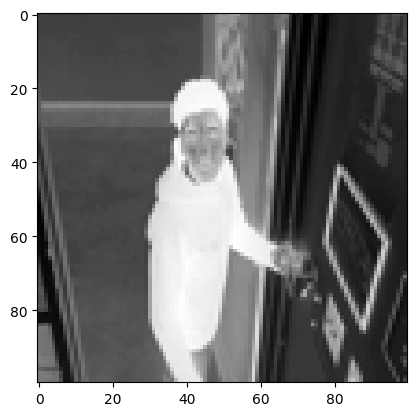

In [ ]:
plt.imshow(test_images[19],cmap=plt.cm.binary)
plt.show()

25) Print the label that represents this image (numerical value).  

In [ ]:
test_labels[19]

4

26) Print the corresponding students' name that is represented by this image.

In [ ]:
student_names[19]

'Zediwa_De Jesus'

Now we can make predictions and get probabilities.  I will be checking this block to make sure that everything above it has run. Do not edit this block of code at all.

In [ ]:
pred, prob = predict(model,test_tensors)

9/9 [==============================] - 0s 3ms/step


In [ ]:
pred

array([ 0,  0,  0,  0,  0,  1, 19,  1,  1,  1,  3,  3,  3,  3, 30, 23, 34,
        4,  4,  4,  4,  4, 13, 26,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
       29, 27,  6,  6, 12,  5,  6,  6,  7,  6,  7,  7,  7, 29,  7,  7,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 34, 10, 10, 10, 10, 15, 33,
       10, 10, 15, 10, 10, 15, 11, 11, 11, 11, 11, 11, 11, 11, 29, 29, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,  6, 13, 16,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 13, 18, 18, 18, 18, 18,
       18, 18, 19,  6,  7, 19, 15, 19, 19, 19, 19, 19, 19, 20, 20,  5, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 11, 29, 29, 29,
       29, 21, 21, 26, 23, 23, 23, 23,  5, 24, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 20, 23, 23, 23, 23, 23, 23, 23, 23, 26, 23, 23, 20, 23, 24,
       25, 25, 25, 25, 25, 35, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 27

27) Describe what these numerical values mean.

Answer: These are predicted values made by the machine model.

In [ ]:
prob

array([0.9991483 , 0.99998385, 0.9999884 , 0.9999923 , 0.99992687,
       0.98560244, 0.61838025, 0.9555405 , 0.8724151 , 0.99963135,
       0.9998238 , 0.9953801 , 0.9999735 , 0.9953713 , 0.9537545 ,
       0.6242187 , 0.40284753, 0.8598589 , 0.9809743 , 0.99849546,
       0.96271807, 0.97827566, 0.7761217 , 0.82104707, 0.9618373 ,
       0.996405  , 0.99766666, 0.99999803, 0.9986043 , 0.90845937,
       0.9445571 , 0.64928156, 0.98433524, 0.9977485 , 0.69933105,
       0.89165306, 0.99954456, 0.98654497, 0.611988  , 0.99969923,
       0.8507958 , 0.9998257 , 0.8150266 , 0.9999556 , 0.6580127 ,
       0.99919075, 0.9999322 , 0.71192104, 0.82180643, 0.8302595 ,
       0.97292286, 0.98790723, 0.9998107 , 0.99992543, 0.99999887,
       0.99487877, 0.99960214, 0.9996842 , 0.97996056, 0.9510514 ,
       0.9157476 , 0.66377306, 0.9987743 , 0.99845344, 0.99979424,
       0.99881953, 0.95300585, 0.611049  , 0.99997956, 0.9939683 ,
       0.94683313, 0.96284664, 0.99962014, 0.47112077, 0.99999

28) Describe what these numerical values mean.

Answer:  This array represents the accuracy the model gives for an image in the dataset that correspond with the predictions.

29) Print the 30th image in the test image dataset, its label and prediction and probability.

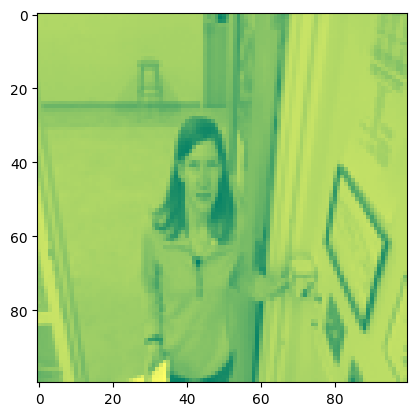

the value is  Donald_Humphrey
The predicted value is  Kenadie_Smith  with probability:  0.35017505


In [ ]:
show_image_vpp(test_images[29],train_labels[29],pred[29],prob[29])

30) Plot the 3rd image in the test_images dataset, its label, prediction, and probability.  

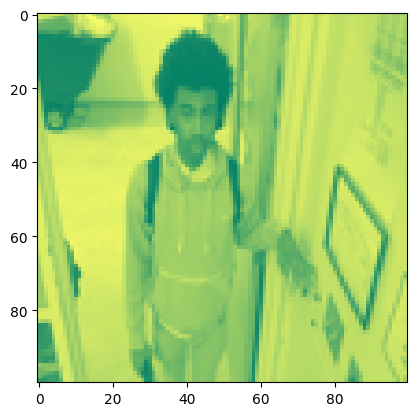

the value is  Donald_Humphrey
The predicted value is  Donald_Humphrey  with probability:  0.9804551


In [ ]:
show_image_vpp(test_images[2],test_labels[2],pred[2],prob[2])

Compute the number of wrong predictions. If everything above is running correctly this code block should run. Do not change it.  

In [ ]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

48

31) Explain which two items are being compared in your own words to get the "wrong_predictions."

Answer: Each test_label is being compared to the corresponding predictiction. If they are not equal, the count for wrong_predictions increases by one.

Determine the number of wrong predictions in the test dataset.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
wrong_predictions_count = 0
for i in range(test_images.shape[0]):
    if test_labels[i] != pred[i]:
      wrong_predictions_count= wrong_predictions_count + 1
wrong_predictions_count

48

Calculate the accuracy on the test_images.  If everything above is running correctly this code block should run. Do not change it.

In [ ]:
accuracy = 1-(wrong_predictions_count/len(test_labels))
accuracy

0.8291814946619217

32) Determine the number of wrong predictions in the training dataset.  


In [ ]:
wrong_predictions_count= len([i for i in range(test_images.shape[0])if test_labels[i] !=pred[i]])
(wrong_predictions_count)

48

33) Calculate the accuracy on the training_images.  

In [ ]:
accuracy = 1-(wrong_predictions_count/len(train_labels))
accuracy

0.9786096256684492

34) Describe why the accuracy of the training images is higher than that of the testing images.  

Answer: The accuracy is higher because there is more data to work with in the training dataset. In addition it has been run through more times.


35) Display the first 10 faces in the training dataset, their predictions and probabilities.


In [ ]:
for i in range(10):
  show_image_vpp(test_images[i], test_labels[i], pred[i],prob[i])



Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.


In [ ]:
model.evaluate(train_tensors, train_labels)

Evaluate the accuracy of the test set using model.evaluate.  Do not change this code.


The accuracy is 6 percent.

Once you get this entire model working (don't worry about the accuracy yet), call me over to grade it.  Once you get it working it will be time to manipulate the building model function and training model function for accuracy.  